# Computing Bootcamp II -- Data Processing (numpy & pandas)


In [0]:
import numpy as np 
import pandas as pd
import os
import fnmatch
import glob
import h5py                             # hdf5 or netcfs (this is 100x faster than netCDF4)
import imageio                          # load png into numpy array
from PIL import Image                   # for working with tiff files
from sklearn import datasets as skdata  # Toy Datasets
import multiprocessing                  # Simple multithreading
import matplotlib.pyplot as plt         

### To mount google drive in runtime to access files in the drive ###
from google.colab import drive
drive.mount('/content/drive')

# To install netCDF4
!pip install netCDF4
from netCDF4 import Dataset
import netCDF4

#%load_ext Cython
#'Magic' commands
#%%time
#%%cython

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!git clone https://github.com/jamesafranke/computing_bootcamp.git

Cloning into 'computing_bootcamp'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 160 (delta 85), reused 46 (delta 11), pack-reused 0
Receiving objects: 100% (160/160), 1.75 MiB | 28.42 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [0]:
#!pip install nco
#from nco import Nco
#nco = Nco()
#temperatures = nco.ncra(input=ifile, returnArray=True).variables['T'][:]

In [0]:
#Change the current working directory to folder on drive
homedir = '/content/drive/My Drive/Bootcamp'
os.chdir(homedir)

print("current directory is : " + homedir)

current directory is : /content/drive/My Drive/Bootcamp




---



---



---



---



# Day 1: Numpy & Gridded Data

# Initializing arrays
Array and ndarray: Learn to construct an array.

**Tip: Initalization of arrays is always the slowest step. Minimize how many times you are creating arrays.** --> manipulate and write-to arrays whenever possible

In [0]:
#If I delete print, the last line of output override the previous ones? Yes
print(np.zeros((10)))
print(np.ones((10)))

#Construct a ndarray
print('Construct 3x3 ndarray')
print(np.zeros((3,3)))

#Equivalent to
a = np.zeros(10)
print('Before Filling with any specified element: ')
print(a)
a.fill(1)
print('Before Filling with 1: ')
print(a)

#Initialize array with np.nan values
a.fill(np.nan)
print('Initialize array with np.nan: ')
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Construct 3x3 ndarray
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Before Filling with any specified element: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Before Filling with 1: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Initialize array with np.nan: 
[nan nan nan nan nan nan nan nan nan nan]


In [0]:
#### Find the dimensions of your array ###
np.shape(a)
a
a[0:3]

array([nan, nan, nan])

## Slicing numpy array


In [0]:
arr = np.arange(0,10,dtype=int)
#Subset to first five digits
print(arr[:5])
#Reverse the array
print(arr[::-1])
print(np.flip(arr))
#Pick out the ones that are odd numbers
print(arr[(arr % 2 == 1)])

[0 1 2 3 4]
[9 8 7 6 5 4 3 2 1 0]
[9 8 7 6 5 4 3 2 1 0]
[1 3 5 7 9]


## Reading in Data: numpy, csv, netcdf (hdf5), png, tiff

In [0]:
#filename = 'all_data_cape_test.npy'
#data = np.load(filename).tolist()

#Reading netCDF4 Climate data
filename = 'Montly_temperature_climate_model_CCSM4.nc4'
dirpath = '/content/drive/My Drive/Bootcamp/Data/'
data = h5py.File(os.path.join(dirpath+'climate_data/',filename),'r')

#filename = 'foo.csv'
#data = pd.read_csv(os.path.join(dirpath,filename),sep=',')

#face = imageio.imread(dirpath+'/RenderData-2.png')
#plt.imshow(face)
#plt.show()

#im = Image.open('Data/soybean_YieldPerHectare.taif')
#im = np.array(im)
#im = regrid(im, 360, 720)

In [0]:
rootdir = '/content/drive/My Drive/Bootcamp/Data/crop_data/yield_simulations'
T = '-1'
filename = 'pdssat_agmerra_fullharm_yield_mai_global_annual_1980_2010_C360_T'+T+'_W0_N200_A0.nc4'
filepath = '%s/%s'%(rootdir,filename)
f = h5py.File(filepath, 'r')
#Check column names of loaded file
print('Show key names of f:')
print(list(f.keys()))
data = f['yield_mai']

#Check the shape of data
print(np.shape(data))


Show key names of f:
['time', 'lat', 'lon', 'yield_mai']
(31, 360, 720)


### Looping through a directory

In [0]:
#rootdir = '**'
filelist  = os.listdir(rootdir)
files     = fnmatch.filter(filelist, '*W0*.nc4')
#I usually use glob
#files     = glob.glob(os.path.join(filelist,'*W0*.nc4'))

## sort filelist maybe??
#list.sort(files, key=lambda x: int(x.split('_')[1].split('.nc4')[0]))

Y = np.zeros((360,720,len(files)))
for i,file in enumerate(files): 
    filepath = '%s/%s'%(rootdir,file)
    y = h5py.File(filepath,'r')['yield_mai']
    print(np.shape(y))
    Y[:,:,i] = np.ma.mean(y[1:30,:,:], axis=0)
    ID = filepath.split('2010_C', 1)[1]
    ID = ID.replace(".nc4", "")
    ID = ID.split("_")

(31, 360, 720)
(31, 360, 720)
(31, 360, 720)
(31, 360, 720)
(31, 360, 720)
(31, 360, 720)
(31, 360, 720)


## Concatenating Arrays

In [0]:
arr1 = [0,1,2]
arr2 = [3,4,5]
print('Stack arrays in sequence horizontally (column wise).')
print(np.hstack([arr1,arr2]))

print('Stack arrays in sequence vertically (row wise).')
print(np.vstack([arr1,arr2]))
print(np.stack([arr1,arr2],axis=0))


Stack arrays in sequence horizontally (column wise).
[0 1 2 3 4 5]
Stack arrays in sequence vertically (row wise).
[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]


## Time saving methods (multi-threading and cython)

One of the slowest operations of any data analysis is opening files. 

In [0]:
import h5py
def useless(T):
    rootdir = '/content/drive/My Drive/Bootcamp/Data/crop_data/yield_simulations'
    f = h5py.File(rootdir+'/pdssat_agmerra_fullharm_yield_mai_global_annual_1980_2010_C360_T'+T+'_W0_N200_A0.nc4','r')
    a = f['yield_mai'][:]#.filled(0)
    a_sum = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            for n in range(a.shape[2]):
                a_sum = a_sum+a[i,j,n]
    #a_cum.tofile(T+'.bin')
    print(T)
    return a_sum

In [0]:
%%time
#T= ['-1']
T = ['-1','0','1','2','3','4','6']
for tt in T: y = useless(tt)
  

-1
0
1
2
3
4
6
CPU times: user 22.2 s, sys: 56.4 ms, total: 22.3 s
Wall time: 22.3 s


In [0]:
#Multiprocessing
%%time
pool = multiprocessing.Pool(processes=2)
r = pool.map(useless, T)
pool.close()

0
-1
2
1
4
3
6
CPU times: user 25.4 ms, sys: 25.2 ms, total: 50.6 ms
Wall time: 22.4 s


Install and load cython package first. 

In [0]:
!pip install cython
%load_ext Cython

Use cython with data type of variables specifically defined. 

In [0]:
%%cython
import h5py

def useless_cython(T):
    # define types of variables for optimization
    cdef int i, j, n
    cdef double a_cum
    rootdir = '/content/drive/My Drive/Bootcamp/Data/crop_data/yield_simulations'
    f = h5py.File(rootdir+'/pdssat_agmerra_fullharm_yield_mai_global_annual_1980_2010_C360_T'+T+'_W0_N200_A0.nc4','r')
    a = f['yield_mai'][:]
    a_sum = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            for n in range(a.shape[2]):
                a_sum = a_sum+a[i,j,n]
    #a_cum.tofile(T+'.bin')
    print(T)
    return a_sum

In [0]:
%%time
#T= ['-1']
T = ['-1','0','1','2','3','4','6']
for tt in T: y = useless_cython(tt)

-1
0
1
2
3
4
6
CPU times: user 19.9 s, sys: 95.9 ms, total: 20 s
Wall time: 19.9 s


One snapshot of time comsumption.

*   Python: 18.2s.
*   Multiprocessing: 19.6s. (Why???)
*   Cython: 17.2s.




**Conclusion:** For the example shown above, using cython saves about 10% of time it takes to load and finish specified calculation of several nc files.  <br>
I have tested on a larger research project with cython vs python, it can improve computational efficiency by 20% for a wrf-python package function.


## Time saving in numpy (avoiding for-loops)

### 1. Use the built-in numpy functions
All the built-in functions in numpy (too many to count) are each essentially to save a for loop... and are almost always the fastest way to do your operation.

In [0]:
#np.linspace
print(np.linspace(0,9,10))
#Use dtype to change the output format, default is float
print(np.linspace(0,9,10,dtype=int))

#np.arange
#arange starts at zero by default
print(np.arange(10))
print(np.arange(0,10,dtype=float))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


### 2. Use np.tile or np.repeat

In [0]:
array = np.arange((12))
matrix = array.reshape((4,3))
print('The reshaped 3x3 matrix: ')
print(matrix)

row_mean = np.mean(matrix,axis=1)
print(row_mean)


The reshaped 3x3 matrix: 
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[ 1.  4.  7. 10.]


Here are examples of ndarray computation: The dimensions have to match. 

In [0]:
#The following line will produce an error
#print(matrix - row_mean)

#The following is one standard way with np.repeat
print('Anomaly along the second dimension: ')
anom_matrix = matrix - np.repeat(row_mean[:,np.newaxis],3,axis=1) # repeat for 3 times, axis = 1
print(anom_matrix)


Anomaly along the second dimension: 
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


See example from numpy.tile: 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html
<br>
np.tile(A,reps)
<br>
reps: The number of repetitions of A along each axis. <br>
Note: If A.ndim > d, reps is promoted to A.ndim by pre-pending 1’s to it. Thus for an A of shape (2, 3, 4, 5), a reps of (2, 2) is treated as (1, 1, 2, 2).

In [0]:
b = np.array([[1, 2], [3, 4]])
#Repeat b in the second dimension twice (row-wise)
print(np.tile(b,2))
#The above line is equivalent to the following
print(np.tile(b,(1,2)))
#Repeat b in the first dimension twice (column-wise)
print(np.tile(b,(2,1)))

[[1 2 1 2]
 [3 4 3 4]]
[[1 2 1 2]
 [3 4 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


Calculate anomaly with np.tile

In [0]:
#The following is one standard way with np.tile
print('Anomaly along the second dimension: ')
anom_matrix = matrix - np.tile(row_mean,(3,1)).T # repeat for 3 times, axis = 1
print(anom_matrix)
#Alternatively
print('Alternatively, transpose before using np.tile')
print(np.shape(row_mean))
print(np.shape(row_mean.reshape((4,1))))
anom_matrix = matrix - np.tile(row_mean.reshape((4,1)),3) # repeat for 3 times, axis = 1
print(anom_matrix)

Anomaly along the second dimension: 
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
Alternatively, transpose before using np.tile
(4,)
(4, 1)
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


### 3. Use list comprehension, lambda functions, or map()

In [0]:
#List comprehension
# old way 
old_list = [0,1,2,3,4,5]
new_list = []
for i in old_list:
    if i > 2: #filter(i)
        new_list.append(i)
print(new_list)
        
# pythonic way
new_list=[]
new_list = [i for i in old_list if i > 2]
print(new_list)

[3, 4, 5]
[3, 4, 5]


In [0]:
#for i,j in mask1
#zs = np.array([lm.predict(PolynomialFeatures(order).fit_transform(np.array([i,j]).reshape(1,2))) 
#                       for i,j in zip(np.ravel(v1_2d), np.ravel(v2_2d))])

In [0]:
x = np.arange(3)
map(x*x, x)

## Masked Arrays

When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).

In [0]:
a = np.arange(0,20,dtype=int)
#Mask out the elements larger than 10
a = np.ma.masked_where(a>10, a)

print(a)
print(a.data,a.mask)
print('Mean value of masked array a is: ')
print(a.mean())

[0 1 2 3 4 5 6 7 8 9 10 -- -- -- -- -- -- -- -- --]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True]
Mean value of masked array a is: 
5.0


## Practice: calculate anomalies with numpy 


Take the reanalysis dataset given under homedir+'Data/reanalysis_data/' 

> Calculate time mean and zonal mean of one surface field of your choice. <br>
> Calculate land/ocean mean with masked array. <br> 
> Calculate the anomaly. 







In [0]:
# Read Dataset
rootdir = homedir+'/Data/reanalysis_data/'
#f = h5py.File(rootdir+'era5_201507.nc','r')

#Please use netCDF4 (Dataset) if you want to use reanalysis 
f = Dataset(rootdir+'era5_global_201507.nc','r')


#Print all keywords
print(f)
lon = f.variables['longitude']
lat = f.variables['latitude']
time = f.variables['time']
t2m = f.variables['t2m']
land_sea_mask = f.variables['lsm'][0]
print(land_sea_mask)
print(lon[:10],lat[:10],time[:10])
#Check dimensions
np.shape(t2m)

#Calculate the time mean of 2m air temperature
t2m_time_mean = np.nanmean(t2m,axis=0)
print('Time Mean matrix:')
print(np.shape(t2m_time_mean))
t2m_zonal_mean = np.nanmean(t2m,axis=2)
print('Zonal Mean matrix:')
print(np.shape(t2m_zonal_mean))

#Land sea mask is a fractional number from 0 (sea) to 1 (land)
print(len(np.where((land_sea_mask > 0) & (land_sea_mask <1))[0]))


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2019-09-01 14:10:32 GMT by grib_to_netcdf-2.10.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data0/adaptor.mars.internal-1567346976.850188-12356-3-023bfb51-38b0-4097-99ea-7c1d24d0ca70.nc /cache/tmp/023bfb51-38b0-4097-99ea-7c1d24d0ca70-adaptor.mars.internal-1567346976.8512201-12356-2-tmp.grib
    dimensions(sizes): longitude(144), latitude(73), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 d2m(time,latitude,longitude), int16 t2m(time,latitude,longitude), int16 sp(time,latitude,longitude), int16 z(time,latitude,longitude), int16 cape(time,latitude,longitude), int16 tp(time,latitude,longitude), int16 lsm(time,latitude,longitude)
    groups: 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 

(124, 73, 144)


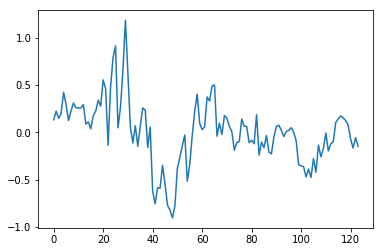

In [0]:
nts = 124 #Total time length
t2m_time_anom = t2m - np.repeat(t2m_time_mean[np.newaxis,:,:],nts,axis=0)
print(np.shape(t2m_time_anom))

ts = np.arange(nts)
#We are not adding anything to the plot yet. Let's save this for visualization part. 
plt.plot(ts,t2m_time_anom[:,0,0])





Construct masked array of land/ocean at first time step (Taking only 60S to 60N). <br>
The data has fractional values in the range 0 (sea) to 1 (land). Here we make a simple assumption to take grids with more than 50% land as a land grid, and vice versa.  

In [0]:
#t2m_land = np.ma.masked_array(t2m[0,:,:], mask=~np.array(land_sea_mask,dtype=bool))
#t2m_ocean = np.ma.masked_array(t2m[0,:,:], mask=np.array(land_sea_mask,dtype=bool))
t2m_land = np.ma.masked_array(t2m[0,12:61,:], mask=~(land_sea_mask[12:61,:] >= 0.5))
t2m_ocean = np.ma.masked_array(t2m[0,12:61,:], mask=~(land_sea_mask[12:61,:] < 0.5))

print('Mean temperature over land is ' + str(round(np.nanmean(t2m_land),2)))
print('Mean temperature over ocean is ' + str(round(np.nanmean(t2m_ocean),2)))

# Temperature anomaly over land, time = 0:
t2m_land_anom = t2m_land - np.nanmean(t2m_land)
print(np.shape(t2m_land_anom))

Mean temperature over land is 293.32
Mean temperature over ocean is 290.79
(49, 144)




---



---



---



---



# Day 2: Pandas

## Reading in Data in Pandas

In [0]:
#filename = 'foo.npy'
#data1 = np.load(os.path.join(dirpath,filename))
dirpath = '/content/drive/My Drive/Bootcamp/Data/reanalysis_data/'
filename1 = 'era5_global_201501.nc'
filename2 = 'era5_global_201507.nc'
data1 = Dataset(os.path.join(dirpath,filename1),'r')
data2 = Dataset(os.path.join(dirpath,filename2),'r')


Using datetime objects in netCDF4:

In [0]:
time = data1['time']
datetime = netCDF4.num2date(time[0],units=time.units,calendar=time.calendar)

print(datetime)
print(datetime.strftime('%Y-%m-%d %H:%M:%S'))
print('The date is: ' + datetime.strftime('%d'))
print('The hour is: ' +datetime.strftime('%H'))

2015-01-01 00:00:00
2015-01-01 00:00:00
The date is: 01
The hour is: 00


Here's an example of dataset from sklearn. We are going through basic pandas built-in functions here:

In [0]:
data = skdata.load_iris()
df_iris = pd.DataFrame(data.data, columns = data.feature_names)
df_iris['target'] = data.target
print(df_iris.head(5))
print(df_iris.tail(5))
#One question: In python output block, print(df) usually give me only a subset 
#of columns but not all due to the length limit. Fix to that?

#Rename the dataset
df_iris_new = df_iris.rename(columns={'sepal length (cm)':'sepal_len','sepal width (cm)':'sepal_wid','petal length (cm)':'petal_len','petal width (cm)':'petal_wid'})
df_iris_new.head()

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[5 rows x 5 columns]


,sepal_len,sepal_wid,petal_len,petal_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Start building a first dataframe (with reanalysis)

In [0]:
df = pd.DataFrame({'year':[0],'month':[0],'date':[0],'hour':[0],'lon':[0],'lat':[0],'t2m':[0],'sp':[0],'d2m':[0],'lsm':[0]})

Adding rows of pandas.DataFrame to the initialized one: Using pandas.DataFrame.append(). 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html <br>

pd.DataFrame append doesn't happen in-place. Be sure to use df = df.append(dfnew). 

In [0]:
filelist  = os.listdir(rootdir)
files     = fnmatch.filter(filelist, 'era5_global*.nc')

df = pd.DataFrame()
print('Total number of files are: '+str(len(files)))

for file in files: 
    filepath = '%s/%s'%(rootdir,file)
    f = Dataset(filepath,'r')
    ID = filepath.split('_global_', 1)[1]
    my_year = ID[0:4]
    my_mth = ID[4:6]
    lon = f['longitude']
    lat = f['latitude']
    time = f['time']
    #Take all time
    #nts = len(time)
    #Or just take 3 days in each month as an example
    nts = 3*4 #3 days
    nlon = len(lon)
    nlat = len(lat)
    print(nlon,nlat)
    #1st dimension: time; 2nd dimension: lat; 3rd dimension: lon.
    lsm = f['lsm'][0,:,:]
    #print(np.shape(lsm))
    for its in range(nts):
      
      #print(time[its])
      datetime = netCDF4.num2date(time[its],units=time.units,calendar=time.calendar)
      my_date = datetime.strftime('%d')
      my_hour = datetime.strftime('%H')
      print('This is: '+ str(datetime))
      
      t2m = f['t2m'][its,:,:]
      sp = f['sp'][its,:,:]
      d2m = f['d2m'][its,:,:]
      
      for ilon in np.arange(nlon):
        for ilat in np.arange(nlat):
            dfnew = pd.DataFrame({'year':[my_year],'month':[my_mth],'date':[my_date],'hour':[my_hour],'lon':[lon[ilon]],'lat':[lat[ilat]],'t2m':[t2m[ilat,ilon]],'sp':[sp[ilat,ilon]],'d2m':[d2m[ilat,ilon]],'lsm':[lsm[ilat,ilon]]})           
            df = df.append(dfnew, ignore_index=True)
            
print(df.head())
print('Total data length:')
print(len(df))
#all_data.head()

#Save DataFrame to csv 
#df.to_csv('./Data/era5_surface_longform.csv')

Total number of files are: 2
144 73
This is: 2015-01-01 00:00:00
This is: 2015-01-01 06:00:00
This is: 2015-01-01 12:00:00
This is: 2015-01-01 18:00:00
This is: 2015-01-02 00:00:00
This is: 2015-01-02 06:00:00
This is: 2015-01-02 12:00:00


KeyboardInterrupt: ignored

Load DataFrame from csv file. 

In [0]:
#Read from csv 
#del df 
#Use first column as index_col, or one additional column of 'Unnamed:0' will appear. 
df = pd.read_csv('./Data/era5_surface_longform.csv',index_col=0)
print(df.head())
print(len(df))

dfnew = df.sort_values(['t2m'],ascending=True)
print('Ascending in order sorted by t2m')
print(dfnew.head())

   year  month  date  hour  ...         t2m             sp         d2m  lsm
0  2015      1     1     0  ...  245.742095  102261.625151  242.939015  0.0
1  2015      1     1     0  ...  247.424084  101344.898018  244.261987  0.0
2  2015      1     1     0  ...  251.545033  100444.179906  248.954074  0.0
3  2015      1     1     0  ...  255.295975   99925.150573  253.068673  0.0
4  2015      1     1     0  ...  260.935493   99248.558764  259.010234  0.0

[5 rows x 10 columns]
252288
Ascending in order sorted by t2m
        year  month  date  hour  ...         t2m            sp         d2m  lsm
245273  2015      7     3    18  ...  196.889020  65305.643600  193.050339  1.0
245200  2015      7     3    18  ...  197.234679  65466.198375  193.785184  1.0
150301  2015      7     1    12  ...  197.692284  61590.878795  194.370656  1.0
244909  2015      7     3    18  ...  198.487693  61830.488460  194.756965  1.0
150592  2015      7     1    12  ...  198.933514  65290.973621  194.609309  1.0



**Note:** Remember that when using the month and date from dataset, you might need to substract 1, because indexing starts at 0 in python. 

## Manipulating Dataframes

**pd.melt**: Rearange the dataset to select certain variables as identifier (id_vars) and others as values (value_vars). 

In [0]:
## Melt 
dfnew = pd.melt(df,id_vars = ['year','month','date','hour','lon','lat'],value_vars = ['t2m','d2m','sp'])
dfnew.head()

## Pivot
#I don't totally understand how could this be applied to a complex dataset. 
#data = skdata.load_iris()
#df_iris = pd.DataFrame(data.data, columns = data.feature_names)
#df_iris['target'] = data.target
#print(df_iris.head(5))
#print(df_iris.keys())
#dfnew = df.pivot(index='lon',columns='lat',values='t2m')

,year,month,date,hour,lon,lat,variable,value
0,2015,1,1,0,0.0,90.0,t2m,245.742095
1,2015,1,1,0,0.0,87.5,t2m,247.424084
2,2015,1,1,0,0.0,85.0,t2m,251.545033
3,2015,1,1,0,0.0,82.5,t2m,255.295975
4,2015,1,1,0,0.0,80.0,t2m,260.935493


In [0]:
## Filter rows
df_NS60 = df[((df.lat >= -60) & (df.lat <= 60))]
#Equivalent to: 
df_NS60 = df.loc[((df.lat >= -60) & (df.lat <= 60))]
#Also equivalent to: Subsetting by finding the location index
df_loc_NS60 = df.iloc[np.where((df.lat >= -60) & (df.lat <= 60))]

print(df_loc_NS60.head())
print(df_NS60.head())
print(df_NS60['lat'].head())
### to keep only rows not in specified dataframe
df_polar = df[~df.index.isin(df_NS60.index)]
print(df_polar.head())
print(df_polar['lat'].head())

    year  month  date  hour  ...         t2m             sp         d2m      lsm
12  2015      1     1     0  ...  282.349629  100798.906122  280.616147  0.00000
13  2015      1     1     0  ...  283.177519  101381.128961  280.907516  0.00000
14  2015      1     1     0  ...  281.888662  102101.534935  279.900850  0.00000
15  2015      1     1     0  ...  278.339682  102941.587281  277.100035  0.98558
16  2015      1     1     0  ...  278.996444  103552.457843  274.321532  0.00000

[5 rows x 10 columns]
    year  month  date  hour  ...         t2m             sp         d2m      lsm
12  2015      1     1     0  ...  282.349629  100798.906122  280.616147  0.00000
13  2015      1     1     0  ...  283.177519  101381.128961  280.907516  0.00000
14  2015      1     1     0  ...  281.888662  102101.534935  279.900850  0.00000
15  2015      1     1     0  ...  278.339682  102941.587281  277.100035  0.98558
16  2015      1     1     0  ...  278.996444  103552.457843  274.321532  0.00000

[5 r

I build the following DataFrames (df1 & df2) intensionally as example for combining DataFrames. 

In [0]:
## Combine dataframes
df = pd.read_csv('./Data/era5_surface_longform.csv',index_col=0)
df1 = df[['year','month','date','hour','t2m']]
df2 = df[['year','month','date','hour','d2m']]
#The following line produces error
#dfnew = df1.join(df2)
#Need to specify suffix (lsuffix for left DataFrame and rsuffix for right one). 
dfnew = df1.join(df2,lsuffix='_df1',rsuffix='_df2')
print(dfnew.head())

#In order to leave out the repeated ones, set the duplicated columns as index
dfnew1 = df1.set_index(['year', 'month','date','hour'])
dfnew2 = df2.set_index(['year', 'month','date','hour'])
# I did not get join working for this part. It gives me a huge dataframe that exceed memory limit. 
dfnew = pd.concat([dfnew1,dfnew2],axis=1)
print(dfnew.head())
#dfnew = pd.merge(df1,df2,how='outer',on=['year', 'month','date','hour'])

#Suggested way to combine DataFrames that have duplicates
df_dup = pd.concat([df1,df2],axis=1)
#Credit to Gene Burinsky: 
#https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
dfnew = df_dup.loc[:,~df_dup.columns.duplicated()]

print(dfnew.head())


   year_df1  month_df1  date_df1  ...  date_df2  hour_df2         d2m
0      2015          1         1  ...         1         0  242.939015
1      2015          1         1  ...         1         0  244.261987
2      2015          1         1  ...         1         0  248.954074
3      2015          1         1  ...         1         0  253.068673
4      2015          1         1  ...         1         0  259.010234

[5 rows x 10 columns]
                             t2m         d2m
year month date hour                        
2015 1     1    0     245.742095  242.939015
                0     247.424084  244.261987
                0     251.545033  248.954074
                0     255.295975  253.068673
                0     260.935493  259.010234
   year  month  date  hour         t2m         d2m
0  2015      1     1     0  245.742095  242.939015
1  2015      1     1     0  247.424084  244.261987
2  2015      1     1     0  251.545033  248.954074
3  2015      1     1     0  255.295975

In [0]:
### loop through rows if all else fails
#for index, row in df.iterrows():
#    append...

SyntaxError: ignored

Lambda function: 
Subsetting to even number rows.

In [0]:
df.iloc[lambda x: x.index % 2 == 0].head()

,year,month,date,hour,lon,lat,t2m,sp,d2m,lsm
0,2015,1,1,0,0.0,90.0,245.742095,102261.625151,242.939015,0.0
2,2015,1,1,0,0.0,85.0,251.545033,100444.179906,248.954074,0.0
4,2015,1,1,0,0.0,80.0,260.935493,99248.558764,259.010234,0.0
6,2015,1,1,0,0.0,75.0,267.301150,98928.378331,262.975212,0.0
8,2015,1,1,0,0.0,70.0,278.447600,98278.749084,277.271968,0.0




---



---



---



---



## Practice: Building your own dataset (Combining reanalysis and crop models)

Start to build your own dataset with the following steps: 


> Read data from reanalysis and crop models. <br>
> Building pandas DataFrame from a structure that contains necessary information. <br>
> Save the DataFrame to your directory. 








# Day 3: Pandas (part 2)

## Method Chaining

In [0]:
co2 = np.array([[338.360, 353.855, 368.865, 389.072, 409.360, 428.876, 450.698, 477.670, 510.634, 549.820, 594.257, 635.649, 669.723],
                [338.360, 353.855, 368.865, 389.128, 411.129, 435.046, 460.845, 486.535, 508.871, 524.302, 531.138, 533.741, 538.358],
                [338.360, 353.855, 368.865, 389.285, 412.068, 430.783, 440.222, 442.700, 441.673, 437.481, 431.617, 426.005, 420.895],
                [338.360, 353.855, 368.865, 389.324, 415.780, 448.835, 489.435, 540.543, 603.520, 677.078, 758.182, 844.805, 935.874]]).transpose()
co2 = pd.DataFrame(co2, columns=['RCP60', 'RCP45', 'RCP24', 'RCP85'], index=np.linspace(1980, 2100, 13)
                  ).reindex(np.linspace(1980, 2100, 121)).interpolate(method='cubic')

### Grouping Dataframes

In [0]:
dfnew = df.groupby(['crop'], as_index = True).rolling(5, center=True).mean().reset_index()

dflin = df.groupby(['countryname', 'crop'], as_index=False).apply(
    lambda x: np.polyfit(x.year, x._yield_, 1)).apply(
    pd.Series).rename(columns={0:'slope', 1:'intercept'}).reset_index()

In [0]:
#load GADM mask at the (360, 720) resolution 
### HOW TO GENERATE GRID FROM THE GADM Data??
country = Dataset('/project/ggcmi/AgMIP.output/processed/masks/aggr/gadm.mask.all.nc4').variables['gadm0'][:]
district = Dataset('/project/ggcmi/AgMIP.output/processed/masks/aggr/gadm.mask.all.nc4').variables['gadm2'][:]

### 
INDmask = np.zeros((360,720))
INDmask = np.ma.masked_where(country != 105, INDmask)
district = np.ma.masked_where(country != 105, district)

#!/bin/env python
timeframe = -(10*365) #last 10 years of daily data
tasmin = Dataset('/project/ggcmi/AgMIP.output/Jim_Emulator/agmerra/dailydata/tasmin_agmerra_1980-2010.nc4').variables['tasmin'][:]
tasmin = tasmin[timeframe:,:,:]
tasmax = Dataset('/project/ggcmi/AgMIP.output/Jim_Emulator/agmerra/dailydata/tasmax_agmerra_1980-2010.nc4').variables['tasmax'][:]
tasmax = tasmax[timeframe:,:,:]
pr = Dataset('/project/ggcmi/AgMIP.output/Jim_Emulator/agmerra/dailydata/pr_agmerra_1980-2010.nc4').variables['pr'][:]
pr = pr[timeframe:,:,:]
np.savetxt('tasmax_grid.csv', np.mean(tasmax, axis=0), delimiter= ',')
np.savetxt('pr_grid.csv', np.mean(pr, axis=0), delimiter= ',')

rm, rmI, CAL, netcdfvar, nvar = getarea('rice')
rootdir = '/project/ggcmi/AgMIP.output/CARAIB/phase2/rice/A0/yield/'
rice = Dataset('%scaraib_agmerra_fullharm_yield_ric_global_annual_1980_2010_C360_T0_W0_NNA_A0.nc4'%(rootdir)).variables['yield_ric'][:]
riceI = Dataset('%scaraib_agmerra_fullharm_yield_ric_global_annual_1980_2010_C360_T0_Winf_NNA_A0.nc4'%(rootdir)).variables['yield_ric'][:]
rice = (rice * rm + riceI *rmI)

rm, rmI, CAL, netcdfvar, nvar = getarea('winter_wheat')
rootdir = '/project/ggcmi/AgMIP.output/LPJmL/phase2/winter_wheat/A0/yield/'
wwh = Dataset('%slpjml_agmerra_fullharm_yield_wwh_global_annual_1980_2010_C360_T0_W0_N200_A0.nc4'%(rootdir)).variables['yield_wwh'][:]
wwhI = Dataset('%slpjml_agmerra_fullharm_yield_wwh_global_annual_1980_2010_C360_T0_Winf_N200_A0.nc4'%(rootdir)).variables['yield_wwh'][:]

rms, rmIs, CAL, netcdfvar, nvar = getarea('spring_wheat')
rootdir = '/project/ggcmi/AgMIP.output/LPJmL/phase2/spring_wheat/A0/yield/'
swh = Dataset('%slpjml_agmerra_fullharm_yield_swh_global_annual_1980_2010_C360_T0_W0_N200_A0.nc4'%(rootdir)).variables['yield_swh'][:]
swhI = Dataset('%slpjml_agmerra_fullharm_yield_swh_global_annual_1980_2010_C360_T0_Winf_N200_A0.nc4'%(rootdir)).variables['yield_swh'][:]
wheat = (wwh * rm + wwhI *rmI + swh * rms + swhI *rmIs)

np.savetxt('rice_prod_grid.csv',  np.mean(rice[-10:,:,:], axis = 0), delimiter= ',')
np.savetxt('wheat_prod_grid.csv', np.mean(wheat[-10:,:,:], axis = 0), delimiter= ',')

year = []
for i in range(10): year.append(np.repeat(2001+i, 365))
year = np.asarray(year).flatten()
day =[]
for i in range(10): day.append(np.arange(1,366,1))
day = np.asarray(day).flatten()

df = pd.DataFrame({'district': [0], 'year': [0], 'day': [0],'tasmin': [0], 'tasmax': [0], 'pr':[0]})
for i,j in np.argwhere(district.mask  == False):
	dfnew = pd.DataFrame({'district': district[i,j], 'year': year, 'day': day, 'tasmin': tasmin[:,i,j], 'tasmax': tasmax[:,i,j], 'pr': pr[:,i,j]})
	df = pd.concat([df, dfnew])

df = df.groupby(['district','year','day'], as_index=False).mean()
df.to_csv('shree_IND_dist_weather_2000_2010.csv', sep=',', index=False)

In [0]:
!pip install geopandas
import geopandas as gp
dis = gp.GeoDataFrame.from_file('DATA/gadm36_USA_shp/gadm36_USA_2.shp')